In [191]:
import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [227]:
# read places 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
places_df=xls.parse('AmazonCities', dtype=str) 
# read sites 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
sites_df=xls.parse('AmazonSites', dtype=str) 
places_df

,City,State,Latitude,Longitude,PlaceCode,StateCode,NAME
0,Washington DC,DC,38.9047,-77.0164,50000,11,"Washington city, District of Columbia"
1,New York,NY,40.76149,-73.9814,51000,36,"New York city, New York"
2,Boston,MA,42.35843,-71.0598,07000,25,"Boston city, Massachusetts"
3,Chicago,IL,41.85003,-87.6501,14000,17,"Chicago city, Illinois"
4,Los Angeles,CA,34.05223,-118.244,44000,06,"Los Angeles city, California"
5,Raleigh,NC,35.7721,-78.6386,55000,37,"Raleigh city, North Carolina"
6,Austin,TX,30.26715,-97.7431,05000,48,"Austin city, Texas"
7,Atlanta,GA,33.749,-84.388,04000,13,"Atlanta city, Georgia"


## Housing Data

data from Census API

In [230]:
# Housing data from Census
housing_df = pd.read_csv("housing.csv")
housing_df = housing_df.merge(places_df,on='NAME')
housing_df

,Unnamed: 0,Homeowner Vacancy Rate,Income,Median Mortgage Cost,Median gross rent,Median home value,NAME,Population,Rental Vacancy Rate,home owner afford,rent afford,City,State,Latitude,Longitude,PlaceCode,StateCode
0,0,2000.0,72935.0,1539.0,1362.0,506100.0,"Washington city, District of Columbia",659009.0,10256.0,0.253212,0.224090,Washington DC,DC,38.9047,-77.0164,50000,11
1,1,19855.0,55191.0,1362.0,1294.0,508900.0,"New York city, New York",8461961.0,76655.0,0.296135,0.281350,New York,NY,40.76149,-73.9814,51000,36
2,2,1136.0,58516.0,1518.0,1369.0,423200.0,"Boston city, Massachusetts",658279.0,5576.0,0.311299,0.280744,Boston,MA,42.35843,-71.0598,07000,25
3,3,13417.0,50434.0,1138.0,987.0,225200.0,"Chicago city, Illinois",2714017.0,40067.0,0.270770,0.234842,Chicago,IL,41.85003,-87.6501,14000,17
4,4,5401.0,51538.0,1410.0,1241.0,496300.0,"Los Angeles city, California",3918872.0,30057.0,0.328301,0.288952,Los Angeles,CA,34.05223,-118.244,44000,06
5,5,1606.0,58641.0,1081.0,966.0,218200.0,"Raleigh city, North Carolina",441326.0,5241.0,0.221210,0.197677,Raleigh,NC,35.7721,-78.6386,55000,37
6,6,1872.0,60939.0,1215.0,1106.0,257800.0,"Austin city, Texas",907779.0,11621.0,0.239256,0.217792,Austin,TX,30.26715,-97.7431,05000,48
7,7,2735.0,49398.0,1112.0,998.0,222300.0,"Atlanta city, Georgia",456378.0,9829.0,0.270132,0.242439,Atlanta,GA,33.749,-84.388,04000,13


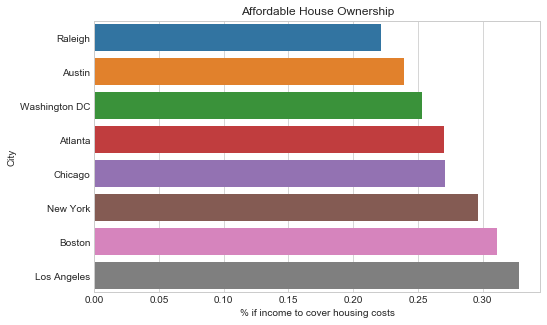

In [231]:

plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('home owner afford')
sns.barplot(y='City',x='home owner afford',data=housing_df)
plt.xlabel("% if income to cover housing costs")

plt.title("Affordable House Ownership")
plt.savefig("affordhouse.png")
plt.show()


In [232]:
ranking_own = pd.DataFrame(housing_df['City'])
#ranking_own=ranking_own.rename(columns={'City':'Housing Owner Affordability'})
ranking_own
ranking= ranking_own
ordered = np.arange(8,0,-1)
ordered
ranking['own'] = ordered 

        

In [233]:
ranking = ranking.set_index('City')

In [234]:
ranking


,own
City,
Raleigh,8
Austin,7
Washington DC,6
Atlanta,5
Chicago,4
New York,3
Boston,2
Los Angeles,1


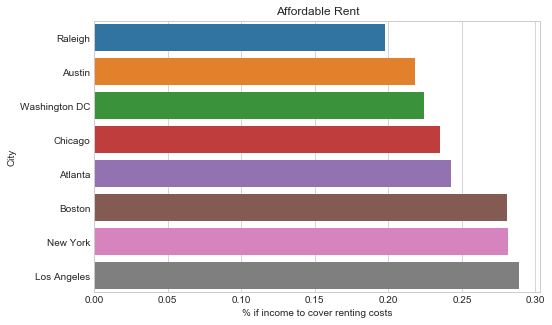

In [235]:
plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('rent afford')
sns.barplot(y='City',x='rent afford',data=housing_df)
plt.xlabel("% if income to cover renting costs")
plt.title("Affordable Rent")
plt.savefig("affordrent.png")
plt.show()

In [236]:
ranking_rent = pd.DataFrame(housing_df['City'])
ranking_rent['rent']=ordered
r = ranking_rent.set_index('City')

ranking['rent']=r['rent']
ranking

,own,rent
City,,
Raleigh,8,8
Austin,7,7
Washington DC,6,6
Atlanta,5,4
Chicago,4,5
New York,3,2
Boston,2,3
Los Angeles,1,1


## Schools

In [237]:
# read data from Great Schools!
school_sites= pd.read_csv("schools_GreatSchool.csv")

In [238]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(school_sites)


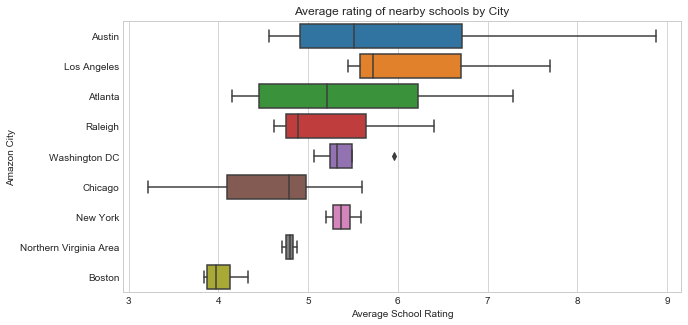

In [239]:
cities = cities.sort_values('Average School Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Average School Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby schools by City")
plt.savefig("ratingsschoolscity.png")
plt.show()

In [240]:
ranking_schools=cities.groupby(['Amazon City'])['Average School Rating'].mean()
ranking_schools=ranking_schools.reset_index()
ranking_schools = ranking_schools.sort_values('Average School Rating', ascending=False)
ranking_schools = ranking_schools.rename(columns={'Amazon City':'City'})
ranking_schools = ranking_schools.drop([6])
ranking_schools = ranking_schools.drop(['Average School Rating'],axis=1)
ranking_schools


,City
4,Los Angeles
1,Austin
0,Atlanta
8,Washington DC
5,New York
7,Raleigh
3,Chicago
2,Boston


In [244]:
ordered = np.arange(8,0,-1)
ranking_schools['schools'] = ordered
schools = ranking_schools.set_index('City')
ranking['k-12 schools']=schools['schools']

In [245]:
ranking

,own,rent,k-12 schools
City,,,
Raleigh,8,8,3
Austin,7,7,7
Washington DC,6,6,5
Atlanta,5,4,6
Chicago,4,5,2
New York,3,2,4
Boston,2,3,1
Los Angeles,1,1,8


In [250]:
ordered

array([8, 7, 6, 5, 4, 3, 2, 1])

## Colleges

In [259]:
schools_df = pd.read_csv("Colleges.csv")

schools_df['Rating'] = schools_df['Rating'].astype(float)
m = schools_df.groupby('Site Name')['Rating'].mean()
am = pd.DataFrame(m)
am = am.reset_index()
am = am.sort_values('Rating', ascending=False)
plt.figure(figsize=(5,10))
# sns.barplot(x='Rating',y='Site Name',data=am)
# plt.title("Average rating of nearby colleges")
# plt.savefig("nearbycollegerating.png")
# plt.show()

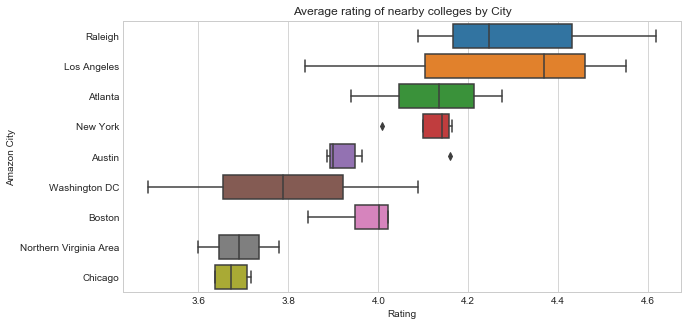

In [260]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(am)
cities = cities.sort_values('Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby colleges by City")
plt.savefig("collegeratingscity.png")
plt.show()

In [261]:
ranking_college=cities.groupby('Amazon City').mean()
ranking_college = ranking_college.reset_index()
ranking_college = ranking_college.sort_values('Rating', ascending=False)
ranking_college = ranking_college.rename(columns={'Amazon City':'City'})
ranking_college

,City,Rating
7,Raleigh,4.316540
4,Los Angeles,4.251865
0,Atlanta,4.121477
5,New York,4.114309
2,Boston,3.967280
1,Austin,3.950070
8,Washington DC,3.788264
6,Northern Virginia Area,3.690000
3,Chicago,3.674632


In [262]:
ranking_college = ranking_college.drop([6])
ranking_college = ranking_college.drop(['Rating'],axis=1)
ranking_college['college'] = ordered
ranking_college=ranking_college.set_index('City')
ranking_college
ranking['college']=ranking_college['college']


In [263]:

ranking

,own,rent,k-12 schools,college
City,,,,
Raleigh,8,8,3,8
Austin,7,7,7,3
Washington DC,6,6,5,2
Atlanta,5,4,6,6
Chicago,4,5,2,1
New York,3,2,4,5
Boston,2,3,1,4
Los Angeles,1,1,8,7


In [266]:
ranking.to_csv("house_afford_school_ranking.csv")